In [1]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
import datetime as dt

In [3]:
#Importing my dataset

sc = pd.read_excel(r"C:\Users\DELL LATITUDE 7390\Desktop\EDA PRoject\Sterling E-Commerce Data.xlsx")

In [4]:
#Loading data
sc.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [5]:
#Examining the data columns/header 
sc.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [6]:
#Checking the data dimension -no. of rows and columns
sc.shape

(283083, 19)

In [7]:
#Reviewing data  types
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [10]:
#Checking for duplicate data
sc.duplicated().sum()

0

In [12]:
##Checking for missing data in each columns/features
sc.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [13]:
#Investigating and visualing missing data
sc[sc.isnull().any(axis=1)]

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
38758,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879766,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,2,36.0
38759,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879765,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,3,45.0
133217,Mobiles & Tablets,Rock Point,Charles,92075,2014-04-08,2022-04-01,"Torkelson, Berneice",F,767619,NaN,cod,Rock Point,715389,South,MD,bttorkelson,20682,2,2919.9
145889,Mobiles & Tablets,Uniopolis,Auglaize,111166,2017-02-23,2022-07-21,"Cannon, Shamika",F,872703,NaN,cod,Uniopolis,406105,Midwest,OH,svcannon,45888,2,578.9
224999,Computing,Barrington,Camden,40853,2009-08-24,2022-08-12,"Robichaux, Marion",M,883358,NaN,cod,Barrington,986961,Northeast,NJ,mjrobichaux,8007,2,39.9


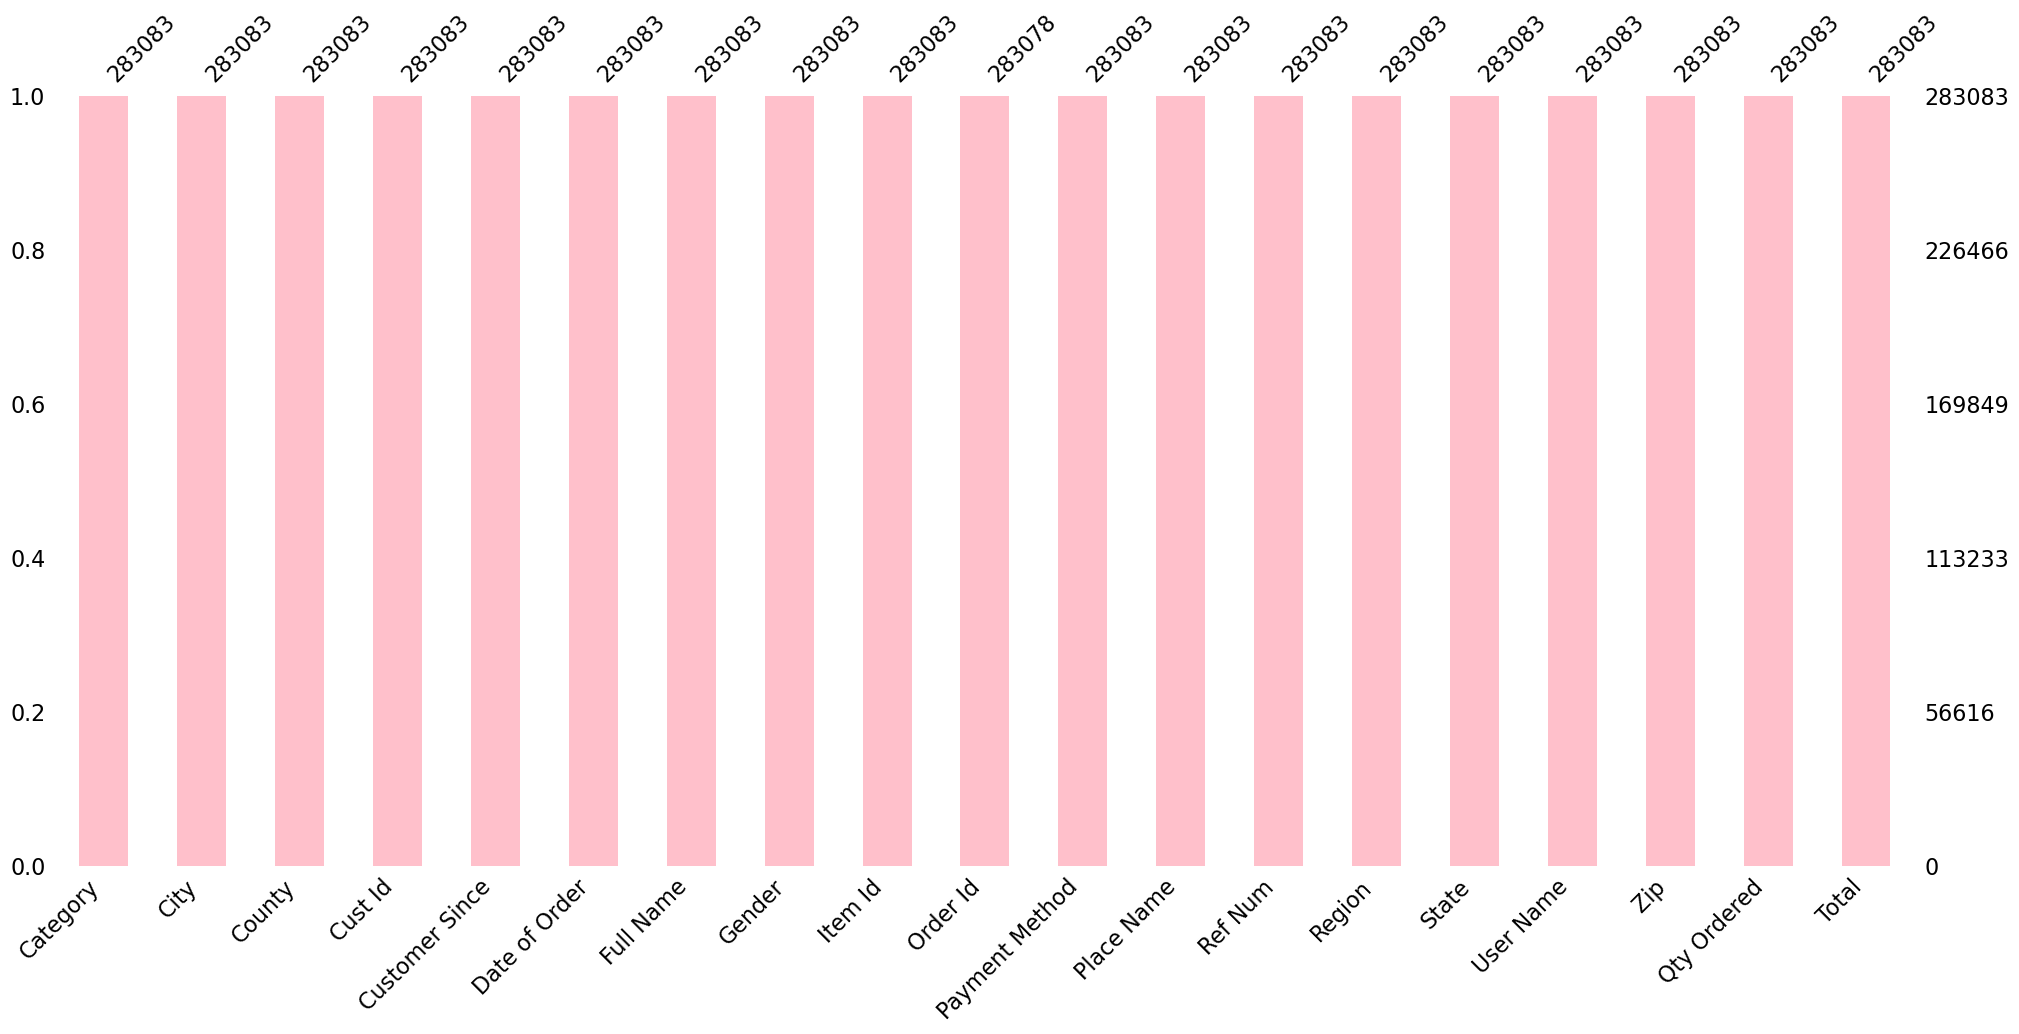

In [14]:
#From the output, the missing value are all under the Order id Column
#We can choose ot ignore this missing values, as the only anaysis we need with Order Id is the total count

#Visualising the mising data
msno.bar(sc, color="pink");

# we can see each columns have 283083 except for the Order Id column with 283078

In [15]:
#Would like to fill in the missing Order Id with zero, so we dont have any item seen as missing when checking the data info
#For OrderId, we cant replace the missing value, as Order value needs to be unique.

sc= sc.fillna(0)

In [16]:
##Again, Checking for missing data in each columns/features after filling in the mising value
sc.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [17]:
#Reviewing the categorical column of the dataset

sc.describe(include=["object","boolean"])

,Category,City,County,Full Name,Gender,Payment Method,Place Name,Region,State,User Name
count,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083
unique,15,15668,2518,63610,2,13,15668,4,49,63407
top,Mobiles & Tablets,Dekalb,Jefferson,"Gonzalez, Joel",M,cod,Dekalb,South,TX,jugonzalez
freq,60954,2525,3510,2524,144295,101750,2525,103482,17510,2524


In [ ]:
#Observations

#We can see the top category, top State as well top customer name, as well as how frequent the customer ordered for an item

In [19]:
#Reviewing the numerical column of the dataset

sc.describe()

,Cust Id,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283083.000000,283083.000000,2.830830e+05,283083.000000,283083.000000,283083.000000,283083.000000
mean,70106.816026,741747.110628,1.004552e+08,561107.885991,49147.171374,3.008224,816.230712
std,30215.394879,95664.609013,4.265584e+05,256101.205409,27235.561738,4.565168,1986.164932
min,4.000000,574769.000000,0.000000e+00,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,659898.500000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,742471.000000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,826078.500000,1.005134e+08,782211.000000,72004.000000,3.000000,800.000000
max,115326.000000,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000


In [ ]:
##OBservation, the highghest qty orders is 501 with tthe higest total shoind as 101,262

In [244]:
#Extracting the Year, Month from the Date of order

sc["Order Year"] = sc["Date of Order"].dt.year
sc["Order Month"] = sc["Date of Order"].dt.month_name()

#Extracting how old customer has been patronising the company
sc["Cust_Since"] = (dt.datetime.today() -pd.to_datetime(sc['Customer Since'])).astype('timedelta64[Y]')

sc.head()

#Analysing how long customers has been with the company
def ServiceAge(x):
    if x<=10:
        return "1-10 ServiceAge"
    elif x<=20:
        return "11-20 ServiceAge"
    elif x<=30:
        return "21-30 ServiceAge"
    else:
        return"Above30 ServiceAge"

    #Applying fnc to data
    
sc["ServiceAge"] = sc["Cust_Since"].apply(ServiceAge)
sc.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Region,State,User Name,Zip,Qty Ordered,Total,Order Year,Order Month,Cust_Since,ServiceAge
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Midwest,IA,mcrenaud,50519,3,32.0,2022,August,15.0,11-20 ServiceAge
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.8,2022,August,18.0,11-20 ServiceAge
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.9,2022,August,18.0,11-20 ServiceAge
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,...,Midwest,MN,lmdoiron,55552,2,6822.9,2022,August,9.0,1-10 ServiceAge
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,...,Midwest,MN,lmdoiron,55552,2,2849.9,2022,August,9.0,1-10 ServiceAge


In [ ]:
#Starting wwith Univariate Analysis
# In Univariate analysis, the output is a single column, the data collected and dsitrbution of that column.
#There is no cause-and-effect relationship at all

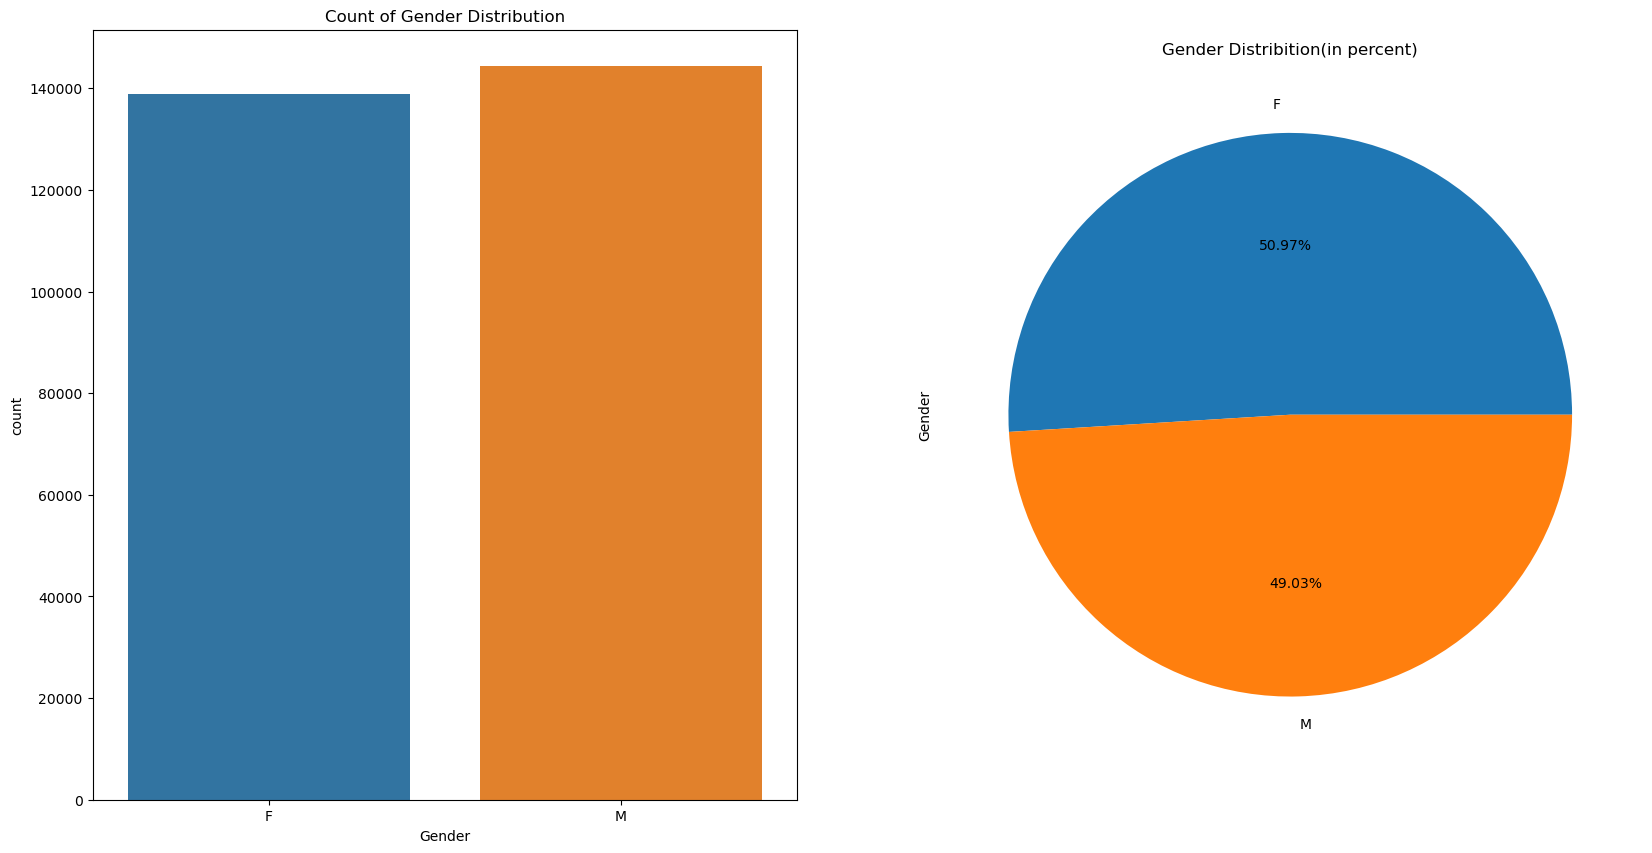

In [40]:
# Visualling the gender distribution 
fig, axs=plt.subplots(1,2,figsize=(20, 10))

sns.countplot(x="Gender", data=sc, ax=axs[0])
axs[0].set(title='Count of Gender Distribution');

count=Counter(sc["Gender"])
sc.Gender.value_counts().plot(kind='pie', labels=count.keys(), autopct=lambda p:f'{p:.2f}%', ax=axs[1])
axs[1].set(title="Gender Distribition(in percent)");
           

              

In [ ]:
#Observation
#There is not so much difference in the gender distribution between both genders. A little less than 2%

In [47]:
#Total Revenue for all product categoreis
Total_Rev =sc.Total.sum()
Total_Rev

231061038.62701994

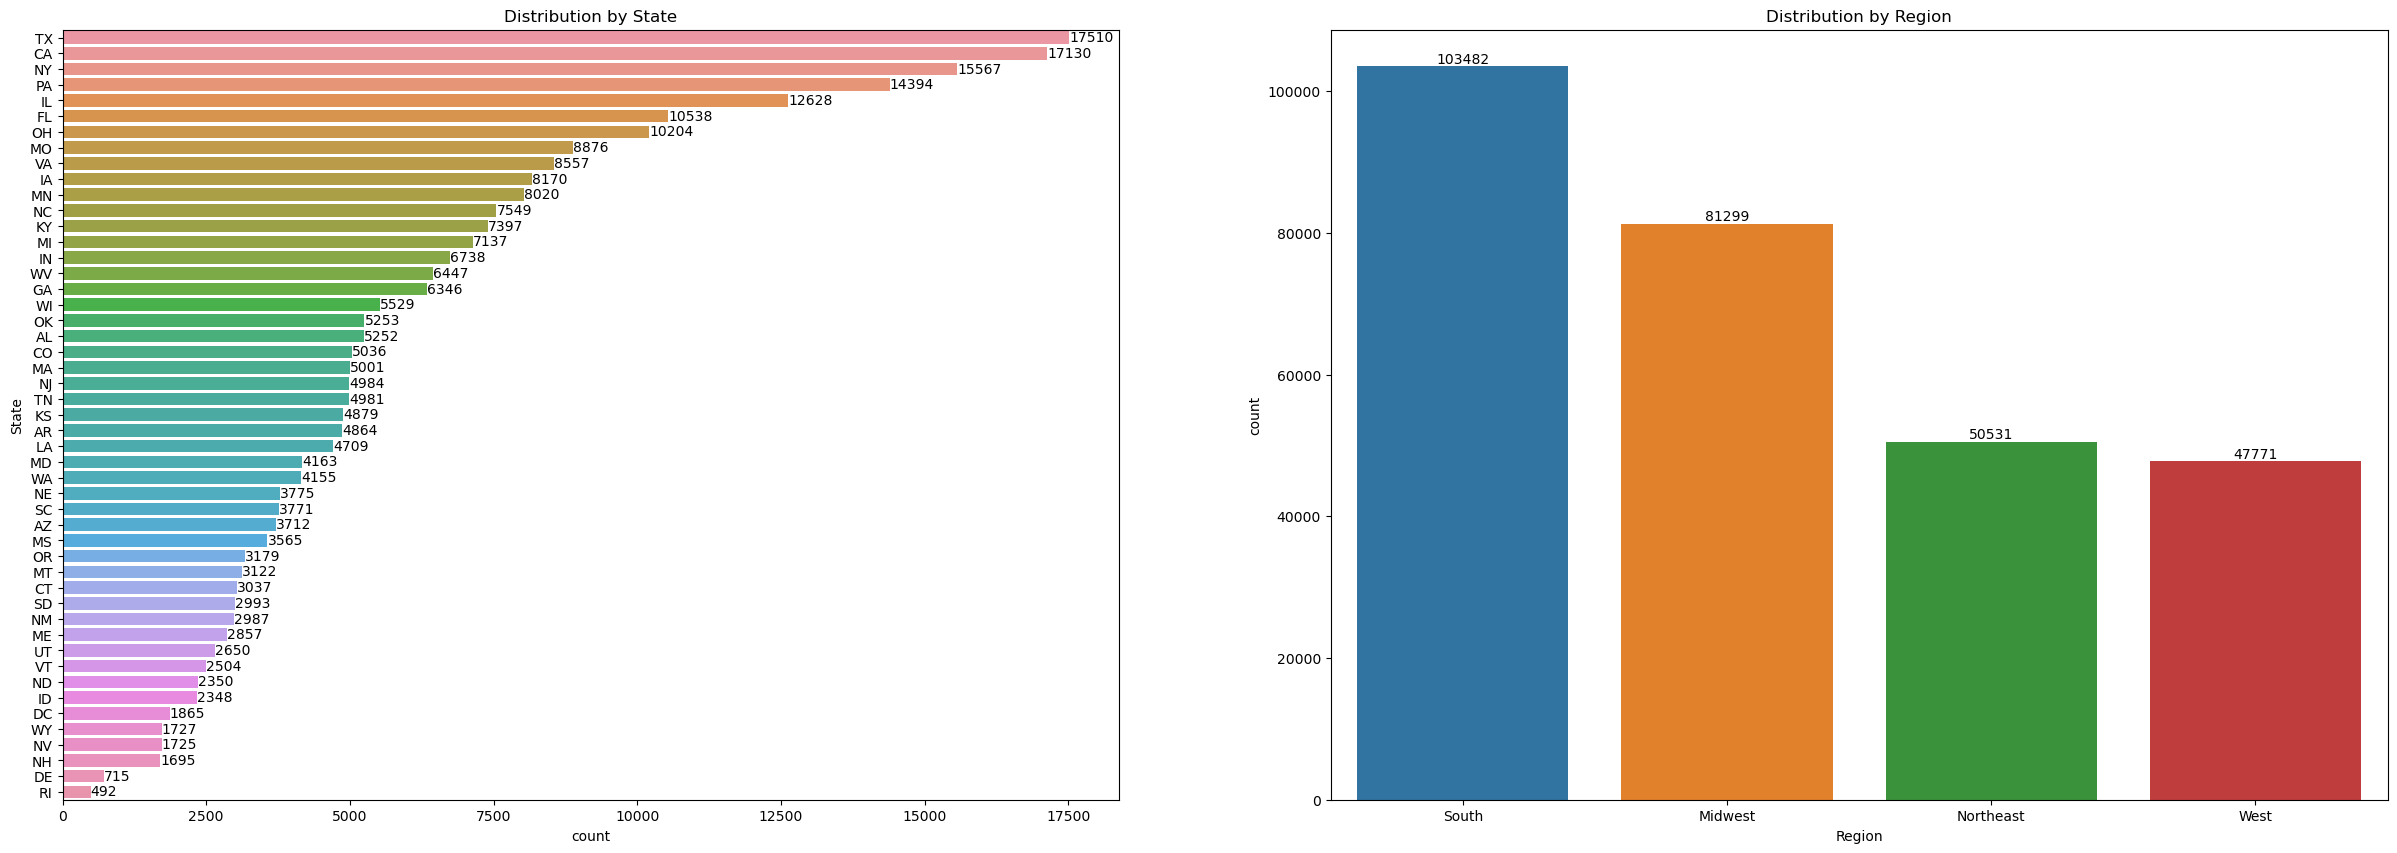

In [77]:
#Analysing the State and Region columns
fig, axs=plt.subplots(1,2,figsize=(30, 10))

ax = sns.countplot(y=sc["State"], order=sc["State"].value_counts(ascending=False).index, ax=axs[0])
axs[0].set(title='Distribution by State')
values = sc["State"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

ax1 = sns.countplot(x=sc["Region"], order=sc["Region"].value_counts(ascending=False).index, ax=axs[1])
axs[1].set(title='Distribution by Region')
values1 = sc["Region"].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0],labels=values1);


In [ ]:
#Narration of Observation
#This distribution shows more patronage from the South region of the country, and the the top State being Texas. 

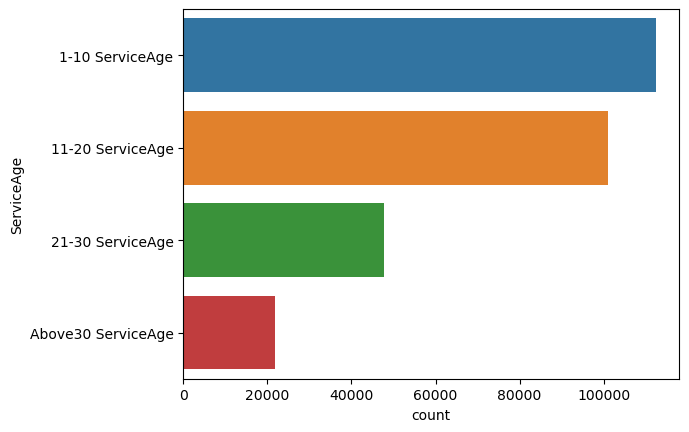

In [256]:
#Analysing the distribution of when customer joing 
Figsize=(30,10)
sns.countplot(y="ServiceAge", data=sc, order=sc["ServiceAge"].value_counts(ascending=False).index);



In [ ]:
#Narration of Observation
#More revenue are generated from new customers who started ordering from the company
#in the last 10years


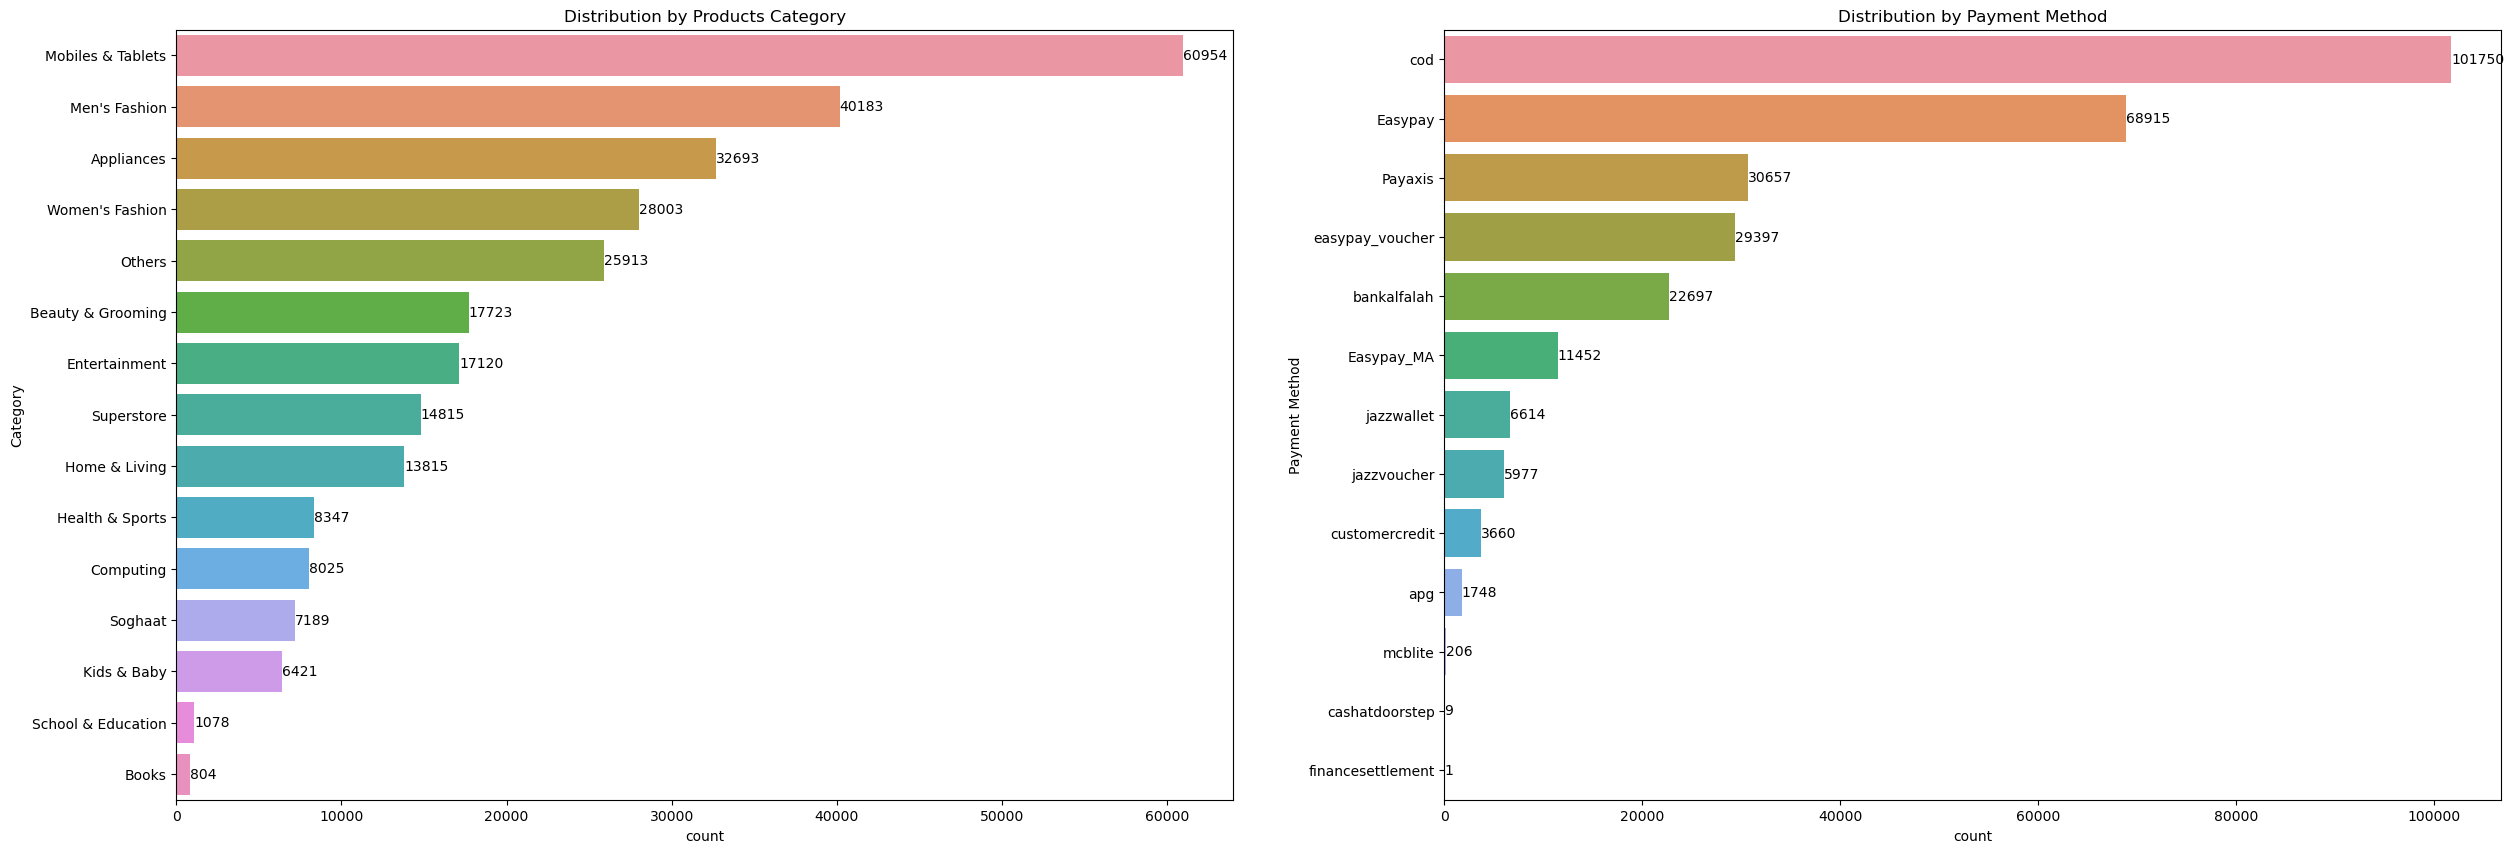

In [103]:
#Quick analysis of distrubition in other columns 

fig, axs=plt.subplots(1,2,figsize=(30, 10))

ax = sns.countplot(y=sc["Category"], order=sc["Category"].value_counts(ascending=False).index, ax=axs[0])
axs[0].set(title='Distribution by Products Category')
values = sc["Category"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

ax1 = sns.countplot(y=sc["Payment Method"], order=sc["Payment Method"].value_counts(ascending=False).index, ax=axs[1])
axs[1].set(title='Distribution by Payment Method')
values1 = sc["Payment Method"].value_counts(ascending=False).values
ax1.bar_label(container=ax1.containers[0],labels=values1);

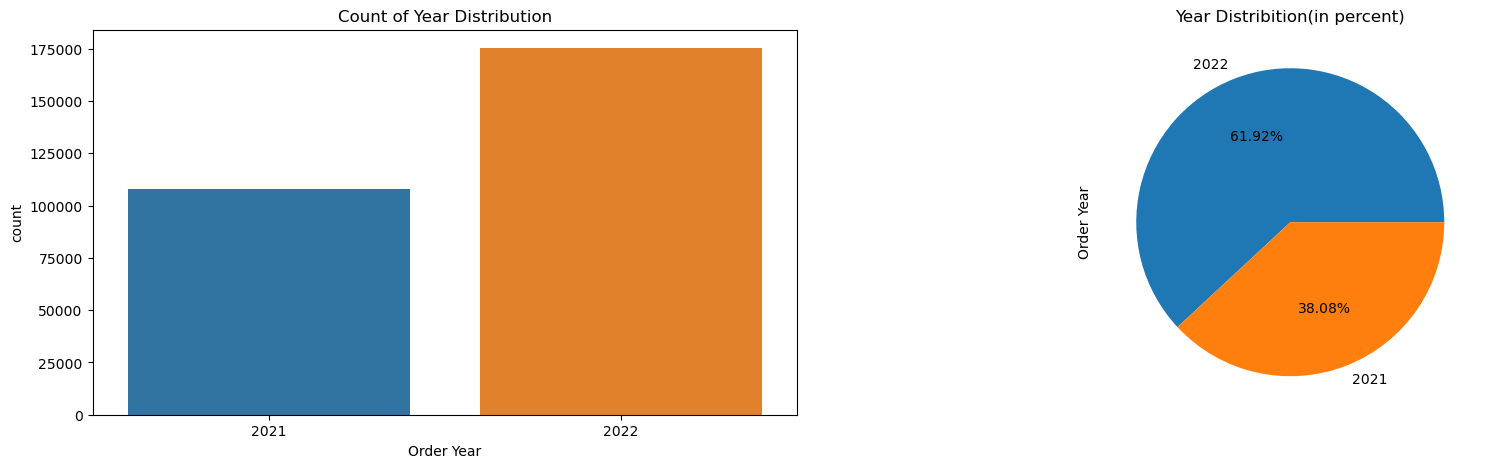

In [158]:
#Quick analysis of distrubition in other columns 


fig, axs=plt.subplots(1,2,figsize=(20, 5))

sns.countplot(x="Order Year", data=sc, ax=axs[0])
axs[0].set(title='Count of Year Distribution');

count=Counter(sc["Order Year"])
sc['Order Year'].value_counts().plot(kind='pie', labels=count.keys(), autopct=lambda p:f'{p:.2f}%', ax=axs[1])
axs[1].set(title="Year Distribition(in percent)");

Text(0.5, 1.0, 'Cust_id')

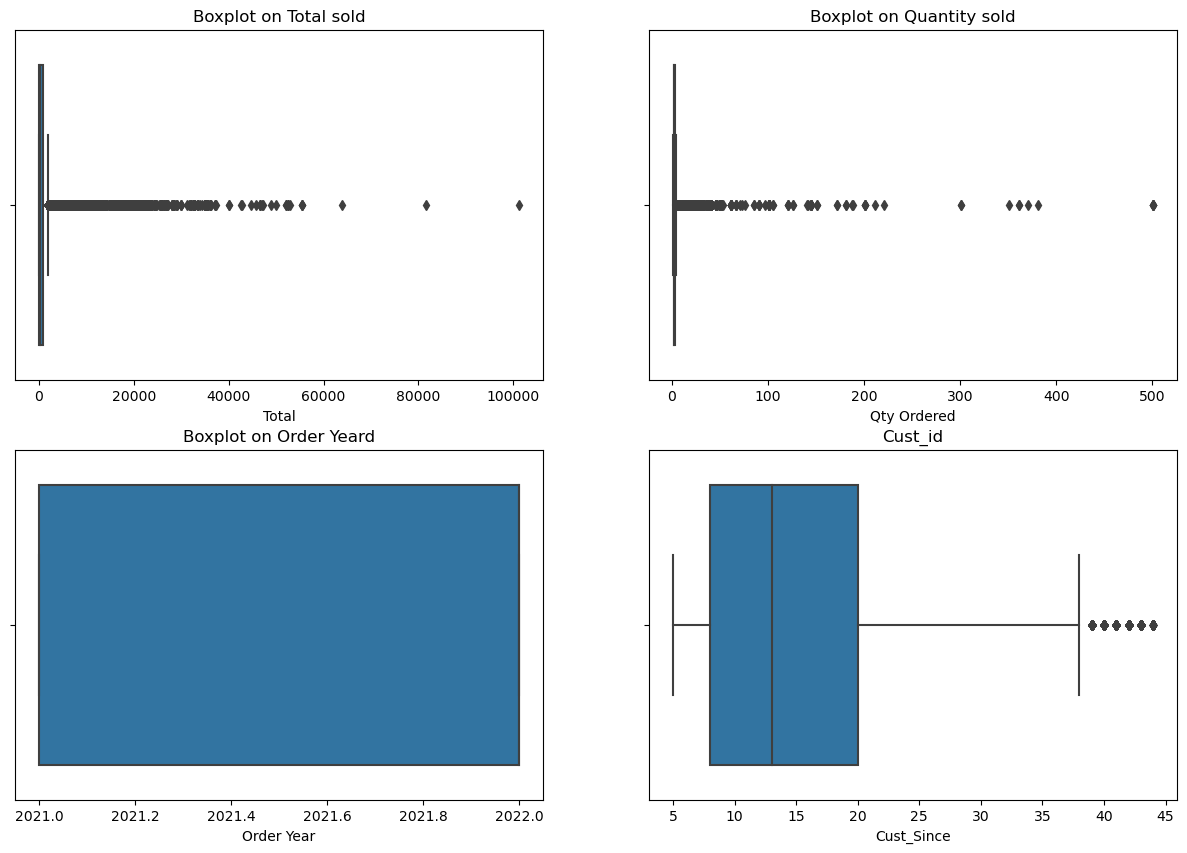

In [112]:
#Urivariate on numericla columns
#Qty, Total, Order Id

fig, axs=plt.subplots(2,2,figsize=(15, 10))

sns.boxplot(x="Total", data=sc, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Total sold")

sns.boxplot(x="Qty Ordered", data=sc, ax=axs[0,1])
axs[0,1].set_title("Boxplot on Quantity sold")

sns.boxplot(x="Order Year", data=sc, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Order Yeard")

sns.boxplot(x="Cust_Since", data=sc, ax=axs[1,1])
axs[1,1].set_title("Cust_id")

Text(0.5, 1.0, 'Category with the highest quanrty ordered')

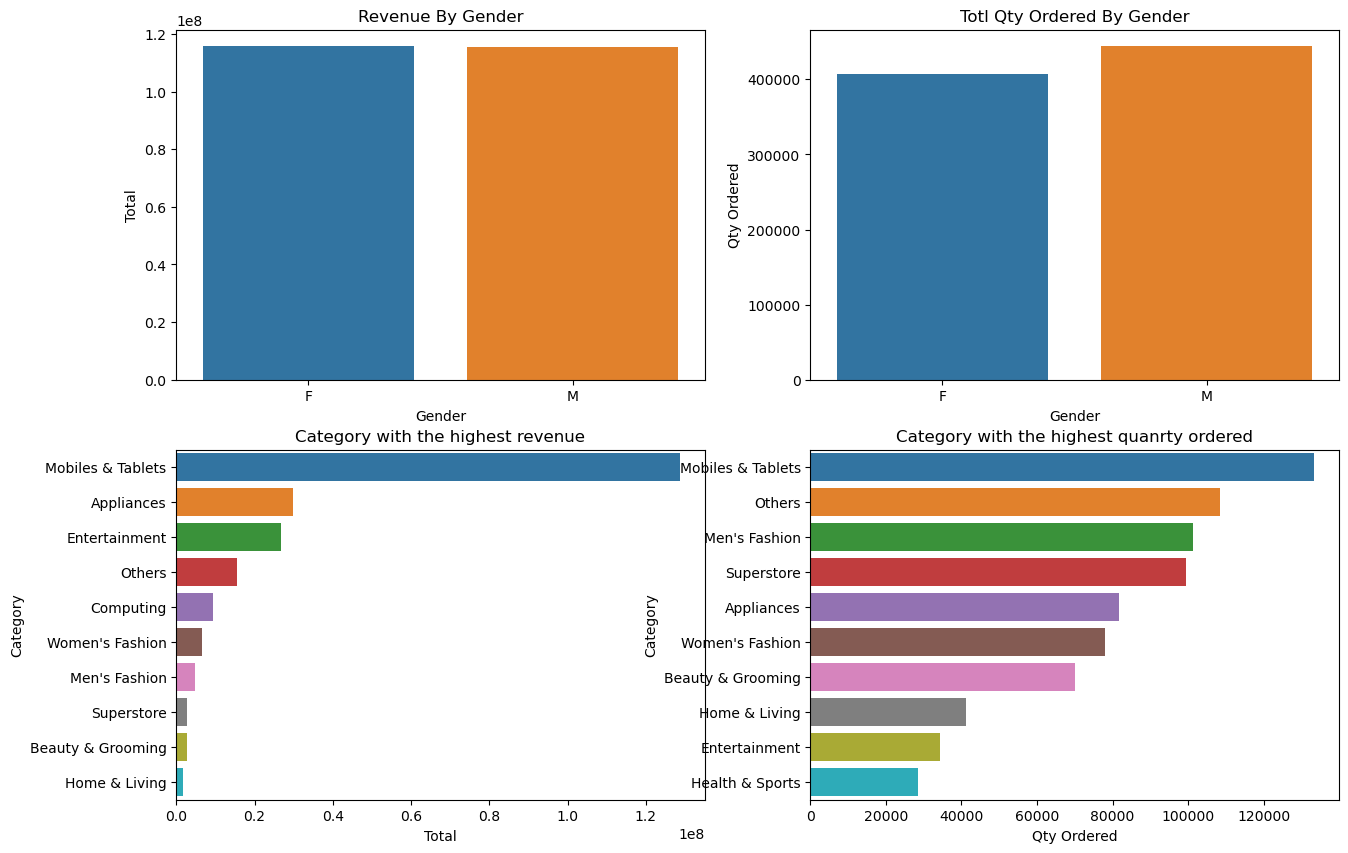

In [257]:
#Bivariate Analisys - Categorical analysis
fig, axs=plt.subplots(2,2,figsize=(15, 10))

# Month with the highest revenue

#Revenue by Gender
RevGe = sc.groupby("Gender")["Total"].sum().reset_index()
sns.barplot(x="Gender", data=RevGe, y="Total", ax=axs[0,0])
axs[0,0].set_title("Revenue By Gender")
            
#Total qty ordered by Gender
QtyGe = sc.groupby("Gender")["Qty Ordered"].sum().reset_index()
sns.barplot(x="Gender", data=QtyGe, y="Qty Ordered", ax=axs[0,1])
axs[0,1].set_title("Totl Qty Ordered By Gender")  

#=================================================================

#Category which generted the highest revenue
RevCat= sc.groupby("Category")["Total"].sum().reset_index().sort_values(by='Total',ascending=False).head(10)
sns.barplot(x='Total', data = RevCat, y='Category', ax=axs[1,0]);
axs[1,0].set_title("Category with the highest revenue")


#Category which generted the highest revenue
QtyCat= sc.groupby("Category")["Qty Ordered"].sum().reset_index().sort_values(by='Qty Ordered',ascending=False).head(10)

sns.barplot(y='Category', data = QtyCat, x='Qty Ordered', ax=axs[1,1]);
axs[1,1].set_title("Category with the highest quanrty ordered")

In [ ]:
#Narration of Observation

# Graph 1 (Revenue By Gender): More revenue are generated from new customers who started ordering from the company
#in the last 10years

Text(0.5, 1.0, 'Quantity of Products ordered by each region By State')

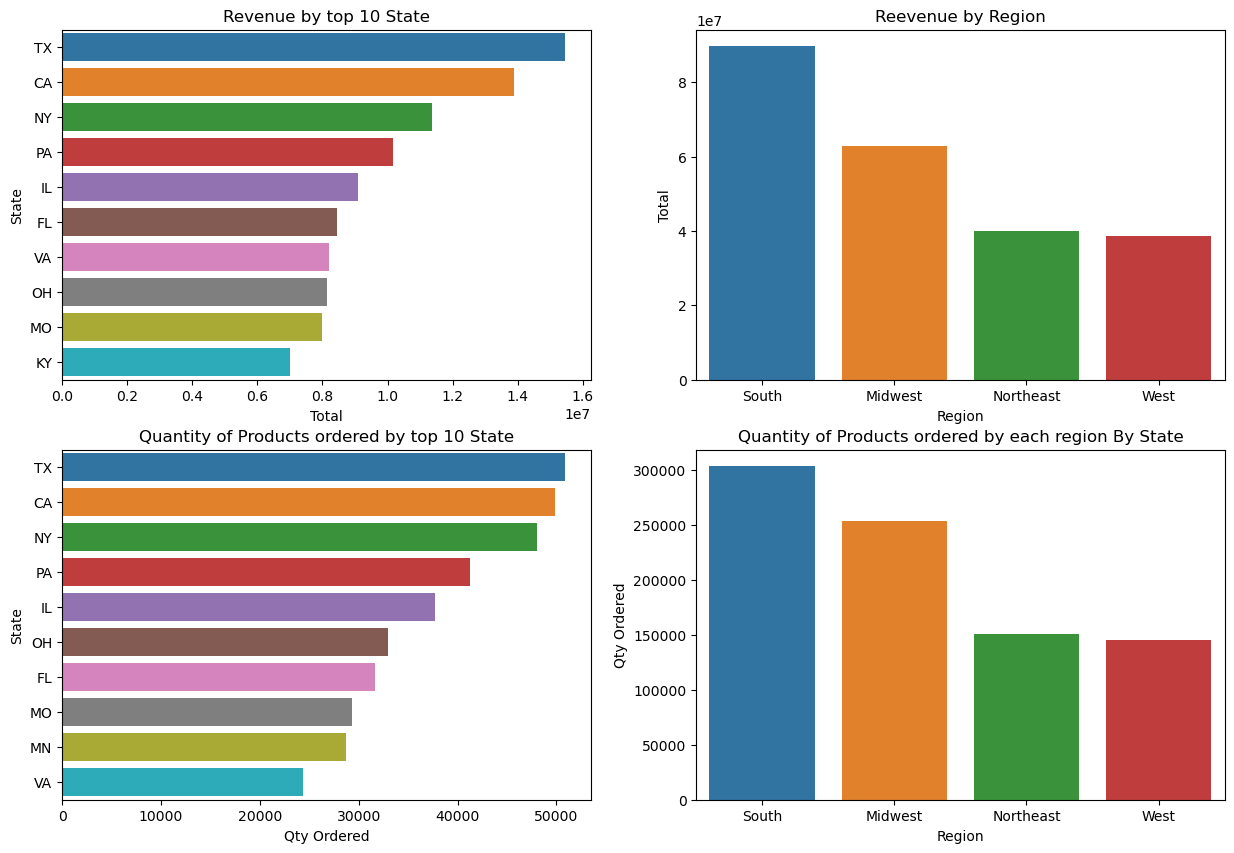

In [201]:
#Bivariate Analisys - Categorical analysis
fig, axs=plt.subplots(2,2,figsize=(15, 10))


#Revenue by State
RevSt = sc.groupby("State")["Total"].sum().reset_index().sort_values(by='Total',ascending=False).head(10)
sns.barplot(y="State", data=RevSt, x="Total", ax=axs[0,0])
axs[0,0].set_title("Revenue by top 10 State")
            
#Revenue by Region r\
RevRe = sc.groupby("Region")["Total"].sum().reset_index().sort_values(by='Total',ascending=False)
sns.barplot(x="Region", data=RevRe, y="Total", ax=axs[0,1])
axs[0,1].set_title("Reevenue by Region")  

#=================================================================

#Qty Ordered by State
QtySt = sc.groupby("State")["Qty Ordered"].sum().reset_index().sort_values(by='Qty Ordered',ascending=False).head(10)
sns.barplot(y="State", data=QtySt, x="Qty Ordered", ax=axs[1,0])
axs[1,0].set_title("Quantity of Products ordered by top 10 State")

#Qty Ordered by Region
QtyRe = sc.groupby("Region")["Qty Ordered"].sum().reset_index().sort_values(by='Qty Ordered',ascending=False).head(10)
sns.barplot(x="Region", data=QtyRe, y="Qty Ordered", ax=axs[1,1])
axs[1,1].set_title("Quantity of Products ordered by each region By State")

Text(0.5, 1.0, 'Top 5 customer by Quantity of products ordered')

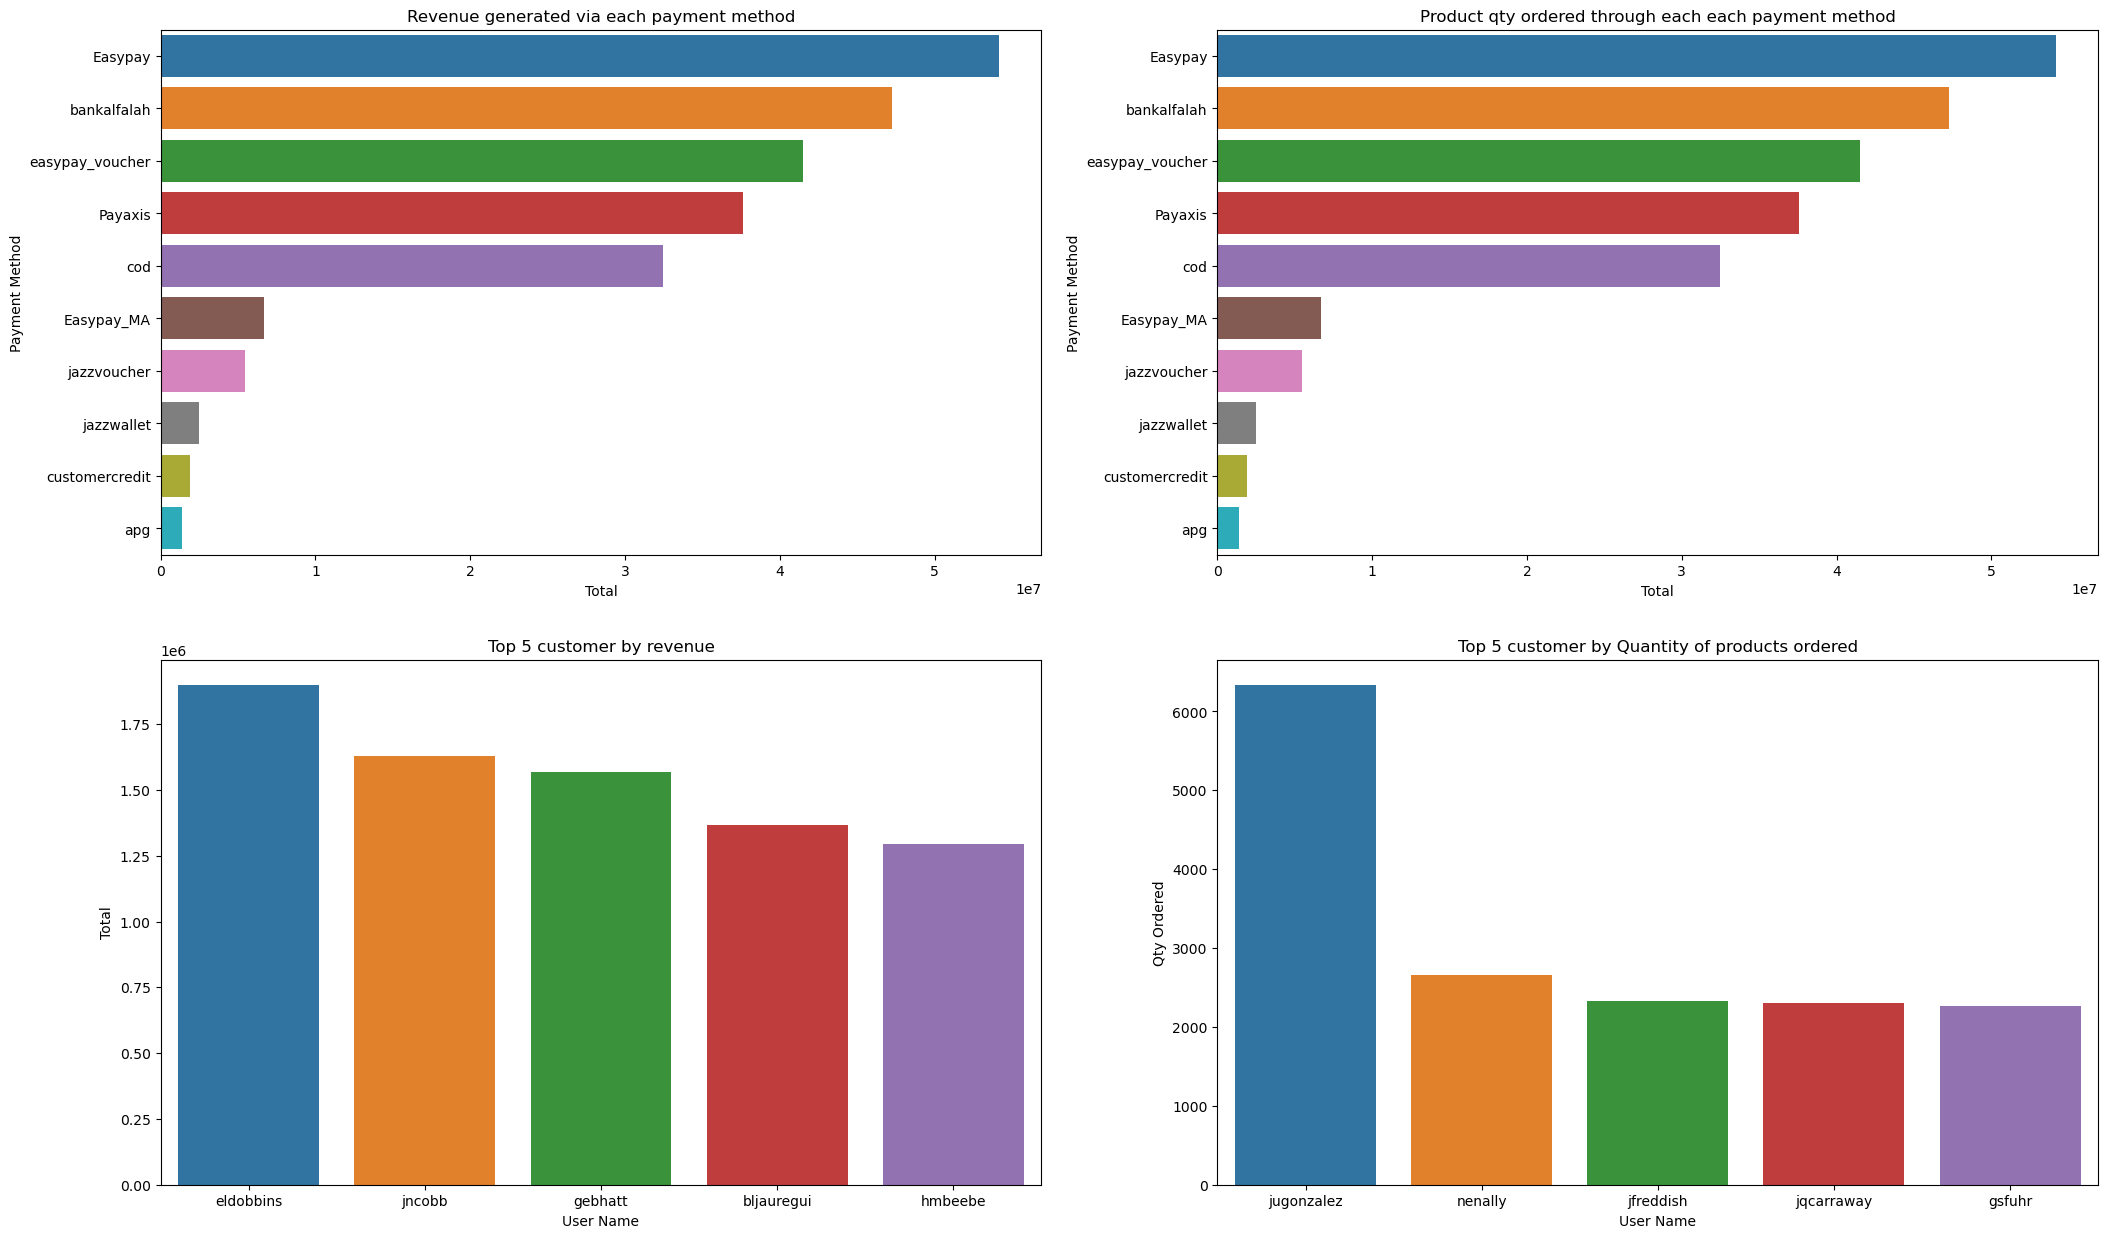

In [218]:
#Bivariate Analisys - Categorical analysis
fig, axs=plt.subplots(2,2,figsize=(25,15))


#Revenue by Payment Method
RevPM = sc.groupby("Payment Method")["Total"].sum().reset_index().sort_values(by='Total',ascending=False).head(10)
sns.barplot(y="Payment Method", data=RevPM, x="Total", ax=axs[0,0])
axs[0,0].set_title("Revenue generated via each payment method")
            
#Qry Ordered by Payment Method r\
QtyPM = sc.groupby("Payment Method")["Total"].sum().reset_index().sort_values(by='Total',ascending=False).head(10)
sns.barplot(y="Payment Method", data=QtyPM, x="Total", ax=axs[0,1])
axs[0,1].set_title("Product qty ordered through each each payment method")

#-------------------------------------------------------------------------

#Revenue generated by our Customer based  Method
Un = sc.groupby("User Name")["Total"].sum().reset_index().sort_values(by='Total',ascending=False).head(5)
sns.barplot(x="User Name", data=Un, y="Total", ax=axs[1,0])
axs[1,0].set_title("Top 5 customer by revenue")

Un1 = sc.groupby("User Name")["Qty Ordered"].sum().reset_index().sort_values(by='Qty Ordered',ascending=False).head(5)
sns.barplot(x="User Name", data=Un1, y="Qty Ordered", ax=axs[1,1])
axs[1,1].set_title("Top 5 customer by Quantity of products ordered")

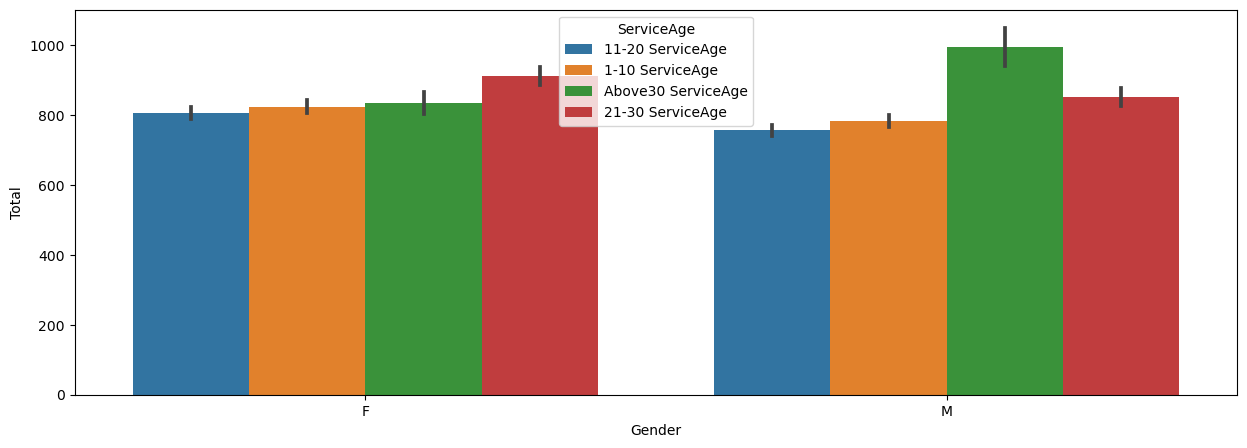

In [245]:
#Bivariate Analisys - Categorical analysis

#WHich months with the highest revenue genereated

plt.figure(figsize=(15,5))
sns.barplot(x="Gender", y="Total", data=sc, hue="ServiceAge");


#Observation
#Taking a look at how long the customer has been partonising the company in terma s of years, we can see that for Male customer, 
#moreprofit is generated from Male customer who has been with the company fro more than 30years
#Also for the females, more profit is generated from females who have been with the company for more than 20years

<Axes: xlabel='Order Month', ylabel='Total'>

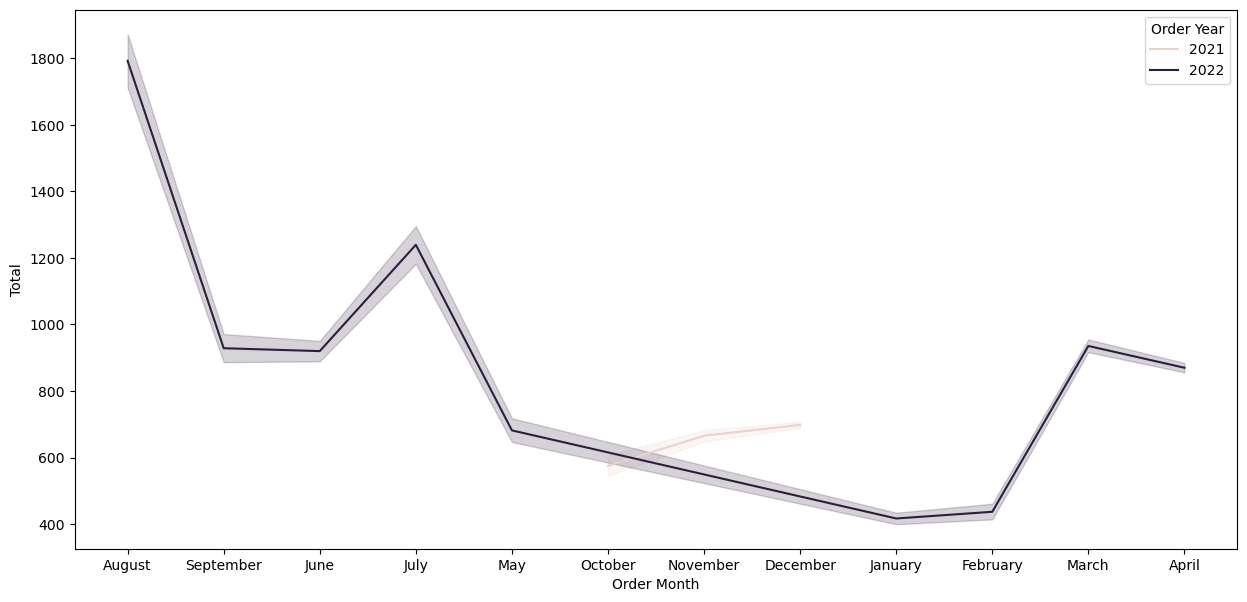

In [237]:
#MultiVriate Analysis

#Product Category against Qautnity orderd and Reveneue generated
plt.figure(figsize=(15,7))
sns.lineplot(x= sc['Order Month'], y=sc["Total"], hue=sc['Order Year'])

C:\Users\DELL LATITUDE 7390\AppData\Local\Temp\ipykernel_284\1227342920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = sc.corr()


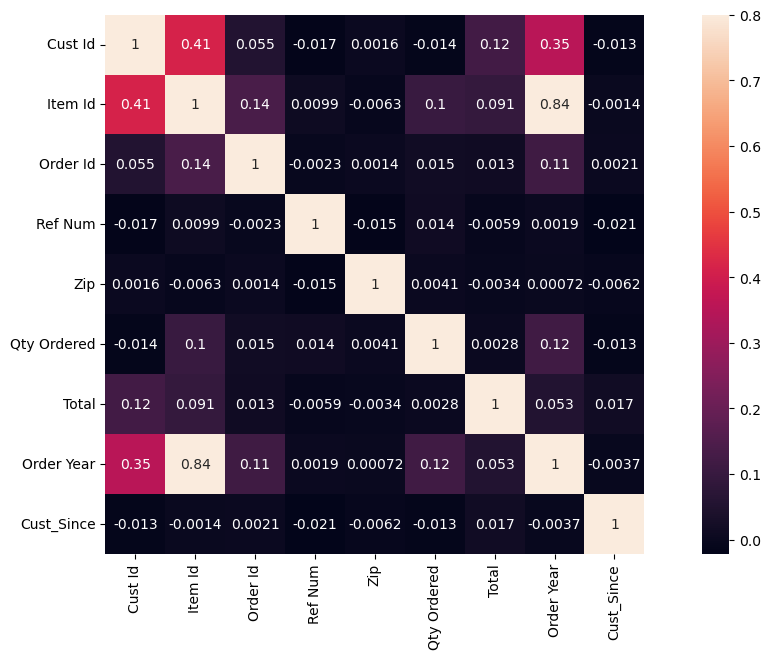

In [246]:
#Checking Correlation between our varibales/clumns
a = sc.corr()
plt.figure(figsize=(15,7))
sns.heatmap(a, vmax=.8, square=True, annot=True);

In [ ]:
#Observation on Correlation

#There is good correlation betwrrn total generated against all other variable (well except for Zip code)
#Howver, there is a decline between how long a customer has been with the company (Cust_since) against qty of products ordered


C:\Users\DELL LATITUDE 7390\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


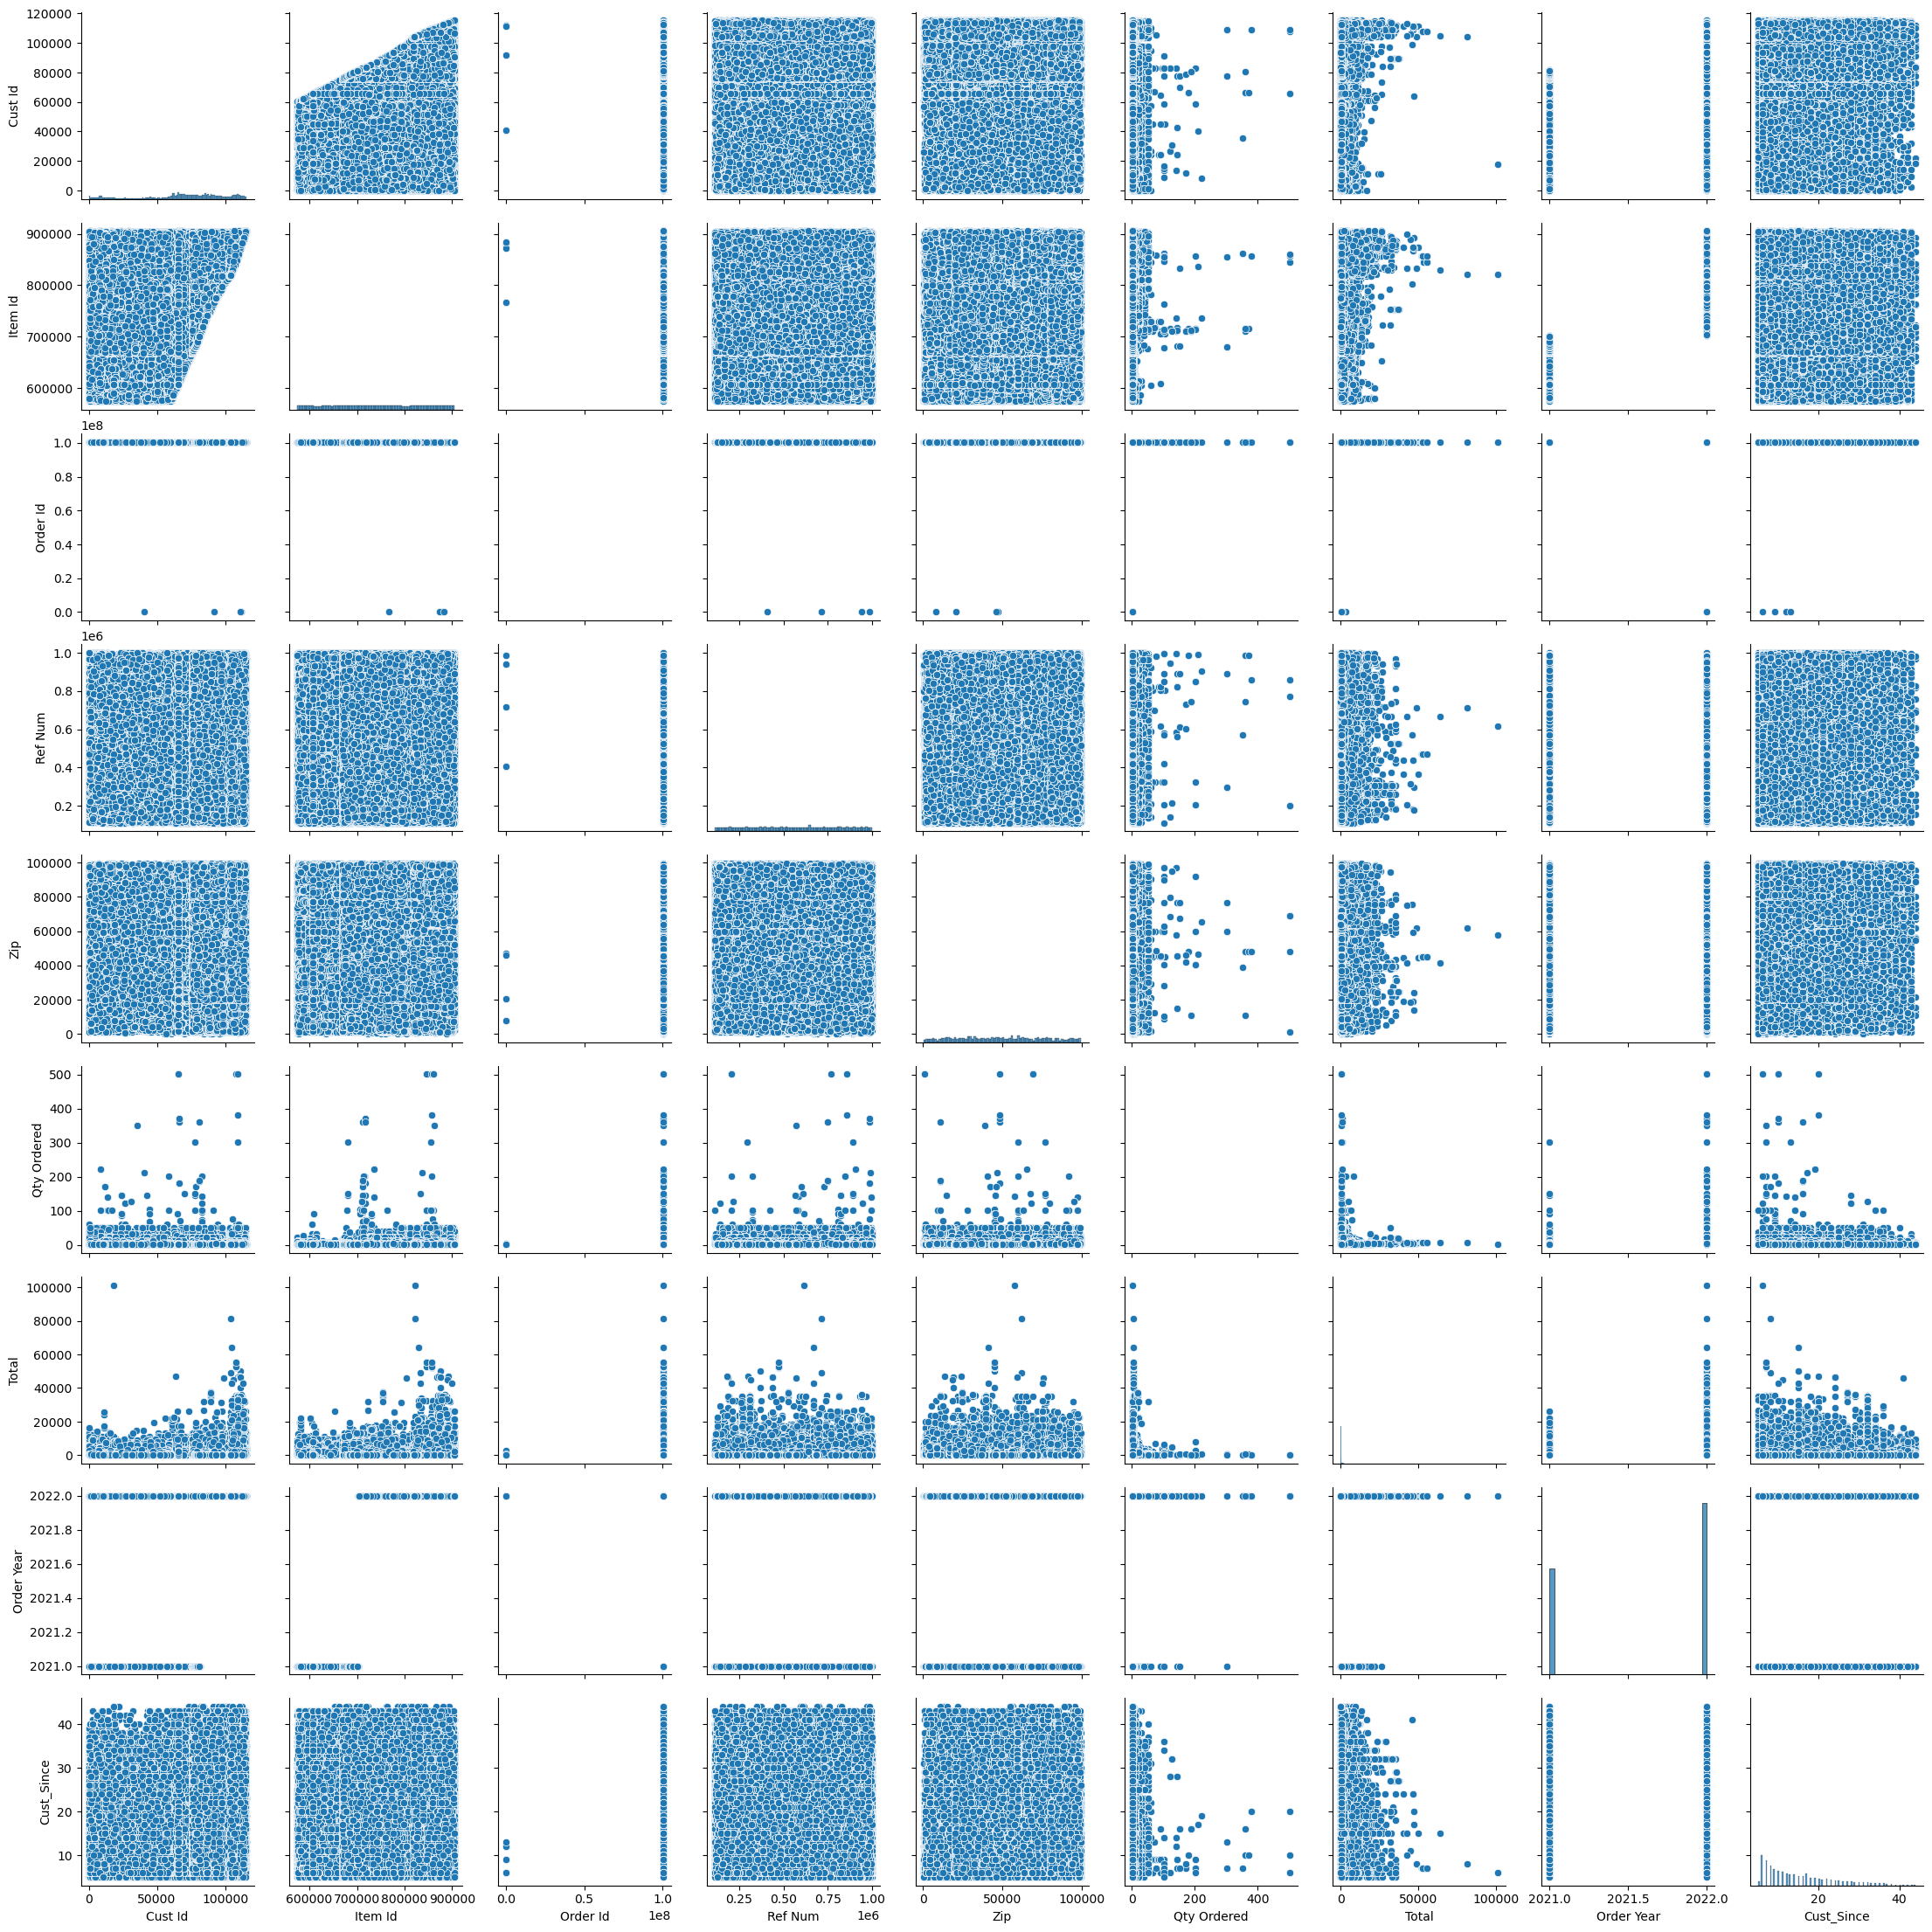

In [184]:
#Pairplot to view all correlations at a glance

sns.pairplot(sc, size=2.5);

In [ ]:
# On conducting a more analysis using box plots, we can seee a notable disparity in consumer behaviors across the generated segments.
#The data have variations in their range, dispersion.
#In addition to comprehending the features individually, there is need to do a more throrough 
#analysis to gain a comprehensive understanding of the consumer behaviour incongruity in the behavior of consumers  Specifically, 